## Name : Bryan Cheng Hengze

# Task A: Data Exploration and Auditing

In [1]:
import pandas as pd

In [2]:
crime = pd.read_csv('Crime_Statistics_SA_2014_2019.csv')

## A1. Dataset size

In [3]:
crime.shape

(385296, 7)

## A2. Null values in the dataset

In [4]:
crime.isnull().values.any()

True

In [5]:
crime.isnull().sum()

Reported Date                    0
Suburb - Incident              159
Postcode - Incident            403
Offence Level 1 Description      0
Offence Level 2 Description      0
Offence Level 3 Description      0
Offence Count                    0
dtype: int64

In [6]:
crime["Suburb - Incident"].fillna("No Location", inplace = True) 
crime["Postcode - Incident"].fillna("No Postcode", inplace = True) 

In [7]:
crime.isnull().values.any()

False

## A3. Data Types

In [8]:
print(crime['Reported Date'].min())

2014-01-01


In [9]:
print(crime['Reported Date'].max())

2019-12-03


In [10]:
print(crime['Reported Date'].dtype)

object


In [11]:
crime['Reported Date'] = pd.to_datetime(crime['Reported Date']) 

In [12]:
print(crime['Reported Date'].dtype)

datetime64[ns]


## A4. Descriptive statistics

In [13]:
crime['Offence Count'].describe()

count    385296.000000
mean          1.164871
std           0.560723
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          28.000000
Name: Offence Count, dtype: float64

## A5. Exploring Offence Level 1 Desription

### 1)

In [14]:
crime['Offence Level 1 Description'].nunique(dropna = True) 

2

### 2)

In [15]:
print(crime['Offence Level 1 Description'].unique())

['OFFENCES AGAINST PROPERTY' 'OFFENCES AGAINST THE PERSON']


### 3)

In [16]:
print(crime['Offence Level 1 Description'].value_counts())

OFFENCES AGAINST PROPERTY      298505
OFFENCES AGAINST THE PERSON     86791
Name: Offence Level 1 Description, dtype: int64


### 4)

In [17]:
x=crime['Offence Level 1 Description'].value_counts().tolist()

In [18]:
percentage = (x[0]/crime['Offence Level 1 Description'].count())*100

In [19]:
print(percentage)

77.47420165275528


## A6. Exploring Offence Level 2 Description

## 1)

In [20]:
crime['Offence Level 2 Description'].nunique(dropna = True) 

9

In [21]:
print(crime['Offence Level 2 Description'].value_counts())

THEFT AND RELATED OFFENCES              152926
PROPERTY DAMAGE AND ENVIRONMENTAL        80047
ACTS INTENDED TO CAUSE INJURY            63747
SERIOUS CRIMINAL TRESPASS                53888
OTHER OFFENCES AGAINST THE PERSON        12327
FRAUD DECEPTION AND RELATED OFFENCES     11644
SEXUAL ASSAULT AND RELATED OFFENCES       7884
ROBBERY AND RELATED OFFENCES              2607
HOMICIDE AND RELATED OFFENCES              226
Name: Offence Level 2 Description, dtype: int64


## 2)

In [22]:
condition1 = crime['Offence Count'] > 1
filt = crime[condition1]

In [23]:
condition2 = crime['Offence Level 2 Description'] == "SERIOUS CRIMINAL TRESPASS"
filt = crime[condition2]
print(filt['Offence Level 2 Description'].value_counts())

SERIOUS CRIMINAL TRESPASS    53888
Name: Offence Level 2 Description, dtype: int64


# Task B:Investigating Offence Count in different suburbs and different years

## B1. Investigating the number of crimes per year

In [24]:
crime['Year']=crime['Reported Date'].dt.year
countoff = {"Offence Count":{"Number of crimes":"count"}}
ncrime = crime.groupby(['Year']).agg(countoff).reset_index()
ncrime.columns = ncrime.columns.droplevel(0)
ncrime=ncrime.rename(columns = {"":"Year"})
ncrime = ncrime.set_index('Year')
print(ncrime)

      Number of crimes
Year                  
2014             87681
2015             90963
2016             92063
2017             42976
2018             47696
2019             23917


C:\Users\Bryan\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [25]:
import matplotlib.pyplot as plt

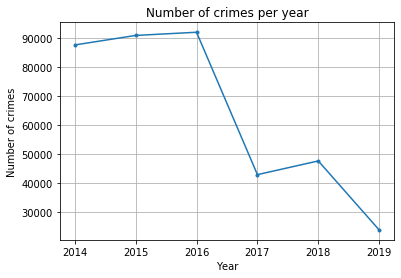

In [26]:
plt.plot(ncrime["Number of crimes"], marker = ".")
plt.xlabel("Year")
plt.ylabel("Number of crimes")
plt.title("Number of crimes per year")
plt.grid(True) 
plt.show()

## B2. Investigating the total number of crimes in different suburbs

### 1)

In [27]:
fun = {'Offence Count':{'Total number of crimes':'sum'}}
filt = crime.groupby('Suburb - Incident').agg(fun).reset_index()
filt.columns = filt.columns.droplevel(0)
filt=filt.rename(columns = {"":"Suburb - Incident"})

C:\Users\Bryan\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(16.8, 1120.0, 'Median: 14.00')

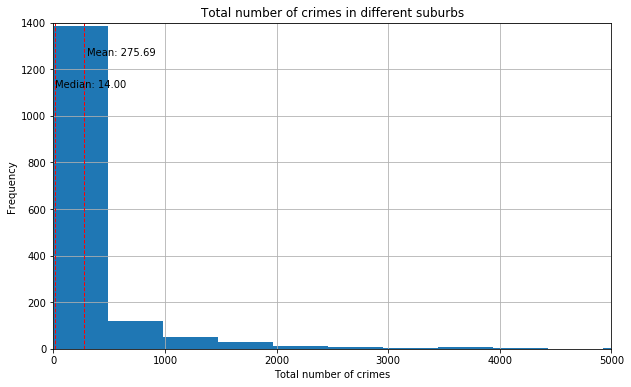

In [28]:
x = filt['Total number of crimes']
x.hist(bins = 50,figsize=(10,6))
plt.xlabel("Total number of crimes")
plt.ylabel("Frequency")
plt.title("Total number of crimes in different suburbs")
plt.xlim(0,5000)               # setting limit on x-axis
plt.ylim(0,1400)               # setting limit on y-axis

plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(x.mean() + x.mean()/10, max_ - max_/10, 'Mean: {:.2f}'.format(x.mean()))

plt.axvline(x.median(), color='red', linestyle='dashed', linewidth=1)
_, max_ = plt. ylim()
plt.text(x.median() + x.median()/5, max_ - max_/5, 'Median: {:.2f}'.format(x.median()))

### 2)

In [29]:
x.mean()

275.6879606879607

In [30]:
x.median()

14.0

### 3)

In [31]:
condition1 = filt['Total number of crimes'] > 5000
totalncrime = filt[condition1]
totalncrime

,Suburb - Incident,Total number of crimes
2,ADELAIDE,24598.0
382,ELIZABETH,5270.0
879,MORPHETT VALE,6679.0
895,MOUNT GAMBIER,6592.0
930,MURRAY BRIDGE,6928.0
994,NOT DISCLOSED,6772.0
1127,PORT AUGUSTA,7298.0
1140,PORT LINCOLN,5241.0
1236,SALISBURY,6046.0


Text(0.5, 1.0, 'Total number of crimes in the suburbs with the highest number of crimes')

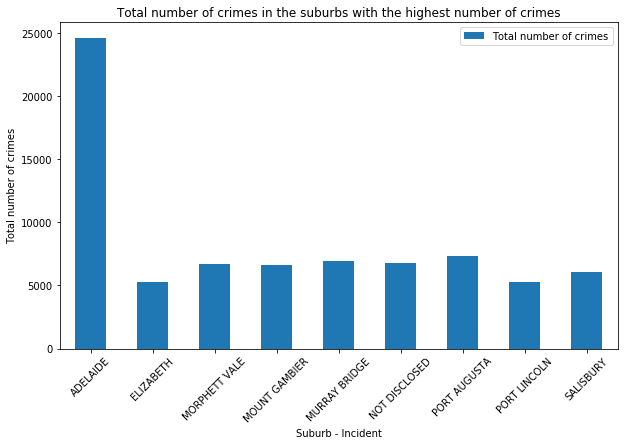

In [32]:
ax=totalncrime.plot.bar(figsize=(10,6))
ax.set_xticklabels(totalncrime['Suburb - Incident'],rotation=45)
plt.xlabel('Suburb - Incident')
plt.ylabel('Total number of crimes')
plt.title('Total number of crimes in the suburbs with the highest number of crimes')

## B3. Daily number of crimes

### 1)

In [33]:
filt2 = crime.groupby(['Reported Date','Suburb - Incident'])['Offence Count'].sum().reset_index()
fun = {'Offence Count':{" ": lambda x:x[x >=15].count()}}
filt3 = filt2.groupby('Suburb - Incident').agg(fun).reset_index()
filt3.head()


,Suburb - Incident,Offence Count
,,
0,ABERFOYLE PARK,0.0
1,ADDRESS UNKNOWN,0.0
2,ADELAIDE,877.0
3,ADELAIDE AIRPORT,0.0
4,AGERY,0.0


### 2)

In [34]:
condition2 = filt2['Offence Count'] >= 15
filt3 = filt2[condition2]
filt3 = filt3.groupby('Suburb - Incident')['Offence Count'].count().reset_index(name ='Number of days')

filt3

,Suburb - Incident,Number of days
0,ADELAIDE,877
1,ASCOT PARK,1
2,DAVOREN PARK,1
3,FINDON,1
4,GLENELG,1
5,LOXTON,1
6,MARLESTON,1
7,MODBURY,1
8,MORPHETT VALE,3
9,MOUNT BARKER,1


Text(0.5, 1.0, 'Number of days that at least 15 crimes have occured per day for each suburb')

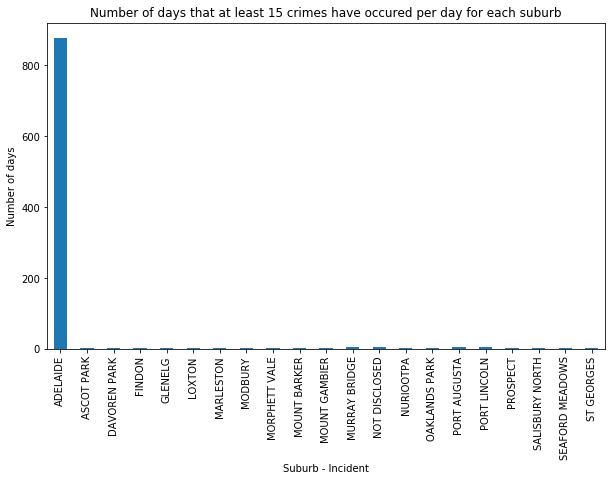

In [35]:
filt3 = filt3.set_index('Suburb - Incident')
ax2=filt3.plot.bar(figsize=(10,6),legend=False)
plt.xlabel('Suburb - Incident')
plt.ylabel('Number of days')
plt.title('Number of days that at least 15 crimes have occured per day for each suburb')

### 3)

Text(0.5, 1.0, 'Number of days that at least 15 crimes have occured per day for each suburb')

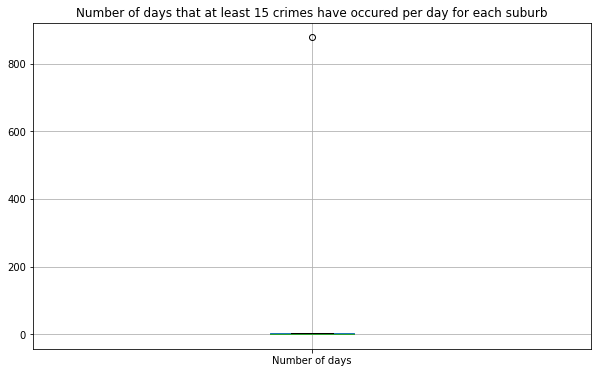

In [36]:
filt3.boxplot(figsize=(10,6))
plt.title('Number of days that at least 15 crimes have occured per day for each suburb')

In [37]:
outlier = ~(filt3['Number of days'] > 160)
filt3 = filt3[outlier]

Text(0.5, 1.0, 'Number of days that at least 15 crimes have occured per day for each suburb')

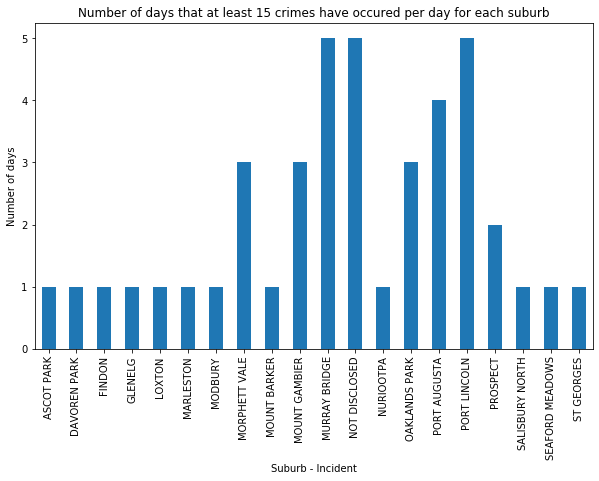

In [38]:
ax3=filt3.plot.bar(figsize=(10,6),legend=False)
plt.xlabel('Suburb - Incident')
plt.ylabel('Number of days')
plt.title('Number of days that at least 15 crimes have occured per day for each suburb')